Python: 3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]

|모듈|버젼|
|----|----|
|pandas|0.25.1|
|numpy|1.18.5|
|sklearn|0.21.3|
|scipy|1.5.2|
|mlxtend|0.15.0.0|
|statsmodels|0.11.1|
|imblearn|0.5.0|
|xgboost|0.80|

멀티캠퍼스 강선구 (sunku0316.kang@multicampus.com)

In [2]:
import pandas as pd
import numpy as np
import sklearn
import scipy 
import mlxtend
import statsmodels
import imblearn
import xgboost as xgb
import sys

print(sys.version)
for i in [pd, np, sklearn, scipy, mlxtend, statsmodels, imblearn, xgb]:
    print(i.__name__,  i.__version__)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]
pandas 0.25.1
numpy 1.18.5
sklearn 0.21.3
scipy 1.5.2
mlxtend 0.15.0.0
statsmodels 0.11.1
imblearn 0.5.0
xgboost 0.80


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# 대문항 세트1

스팸 메일은 광고성 글 혹은 악성 코드를 수반하는 경우가 많아 이를 사전적으로 발견하는 알고리즘이 필수적이다. 스팸 메일을 감지하는 다양한 방법이 존재하지만 세트 1에서는 메시지 내용만을 이용해 스팸 메일을 감지하는 방법을 제시한다.

prof2103_1.csv (구분자: Tab(\t), 5,571 Rows, 2 Columns, UTF-8 인코딩)

|컬럼|정의|타입|
|----|----|----|
|Category|스팸(spam)/정상(ham) 여부|String|
|Message|메시지 내용|String|

## 공통 전처리

**(prof2103_1.csv를 이용하여)** 분석에 앞서 다음의 전처리를 순차적으로 수행하시오.


In [65]:
df_spam_org = pd.read_csv('data/prof2103_1.csv', sep='\t') # 구분자를 \t를 사용하여 불러옵니다.
df_spam_org

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5566,spam,This is the 2nd time we have tried 2 contact u...
5567,ham,Will ü b going to esplanade fr home?
5568,ham,"Pity, * was in mood for that. So...any other s..."
5569,ham,The guy did some bitching but I acted like i'd...


**Step A-1.** 

'Category'컬럼의 값이 'ham'인 경우 0을, 'spam'인 경우 1의 값을 갖는 스팸 여부(변수명: Spam) 변수를 생성한다. 기존의 'Category' 컬럼은 삭제한다.

In [66]:
df_spam = df_spam_org.copy()
df_spam['Spam'] = (df_spam.pop('Category') == 'spam').astype('int')
df_spam['Spam'].value_counts()

0    4824
1     747
Name: Spam, dtype: int64

**Step A-2.** 

주어진 데이터는 스팸 여부(Spam)의 값이 1과 0의 비율이 차이가 많이 나는 불균형 데이터이다. 이 데이터를 그대로 사용한다면 정확도 지표에 대한 유효성이 떨어질 수 있다. 이를 해결하기 위해 언더샘플링을 다음 단계대로 수행하시오.

> **Step A-2-1.** 전체 데이터를 스팸 여부(Spam)의 값이 1인 데이터와 0인 데이터로 분할한 후 얻어진 데이터셋을 각각 A, B라 한다.

> **Step A-2-2.** 사이즈가 보다 큰 class의 사이즈를 줄이기 위해 B 데이터셋에서 0부터 1씩 증가하는 값을 가지는 index 컬럼을 정의하고, 여기서 index가 6의 배수가 되는 데이터만을 추출해 얻어진 데이터프레임을 C라 한다. (즉, 1번째 행, 7번째 행, 13번째 행..으로 구성) 이와 같은 방식으로 약 1/6의 데이터만을 추출한다. 여기서 생성한 index 컬럼은 제거한다.

> **Step A-2-3.** C를 첫 행에서부터 A의 행 수에 해당하는 길이만큼 순서대로 추출한 후, A 뒤에 C를 합쳐 데이터셋 D를 생성한다.

Hint. 생성 결과 데이터셋 D에서의 Spam의 값이 1인 데이터와 0인 데이터의 개수는 같다.

In [67]:
df_A = df_spam.loc[df_spam['Spam'] == 1]
df_B = df_spam.loc[df_spam['Spam'] == 0]
df_C = df_B.loc[np.arange(0, len(df_B)) % 6 == 0] # 간이로 sequence를 만들고 이를 이용하여 6으로 나누어 떨어지는 행을 가져옵니다.
df_D = pd.concat([
    df_A,
    df_C.iloc[: len(df_A)]
])
df_D['Spam'].value_counts()

1    747
0    747
Name: Spam, dtype: int64

**Step A-3.**

0에서 시작해 1씩 증가하는 문서 번호(row_number) 컬럼을 생성한다.

Note. 이 문서 번호는 본 문항 세트(문제 1~4)에서 문서에 대응되는 고유ID에 해당한다.

상기 전처리를 완료한 데이터셋을 **'spam'** (1,494 Rows)으로 정의한다.

(이후 문항에서의 지칭을 위하여 데이터셋 이름을 정의한 것으로, 제출 소스코드에서 반드시 위의 이름을 따를 필요는 없다.)


In [68]:
df_spam = df_D.reset_index(drop=True)
df_spam.index.name = 'row_number'
df_spam

,Message,Spam
row_number,,
0,Free entry in 2 a wkly comp to win FA Cup fina...,1
1,FreeMsg Hey there darling it's been 3 week's n...,1
2,WINNER!! As a valued network customer you have...,1
3,Had your mobile 11 months or more? U R entitle...,1
4,"SIX chances to win CASH! From 100 to 20,000 po...",1
...,...,...
1489,No problem with the renewal. I.ll do it right ...,0
1490,K k:) sms chat with me.,0
1491,Ok leave no need to ask,0


## 문제 1번 10점

**(spam을 이용하여)** 스팸 메일은 광고성 문구가 과도하게 포함되어 있기 때문에 

비스팸 메일에 비해 단어 개수가 평균적으로 높을 가능성이 있다. 

이에 따라 본 문제에서는 스팸 메일과 정상 메일에서 단어의 개수가 평균적인 차이를 보이는지를 테스트하고자 한다. 

본 가설이 맞다면 단어의 수를 세는 것으로 스팸 메일을 판별할 수 있는 가능성(Likelihood)이 증가하게 된다. 

이를 위해 다음 과정을 수행하고 질문에 답하시오.

**Step 1-1.** Message 컬럼의 알파벳 중 대문자는 모두 소문자로 치환한다.

**Step 1-2.** Message 컬럼의 값에서 알파벳만 추출하고 나머지는 삭제한다. 

단어와 단어 사이는 공백(' ')으로 구분한다.

Hint. "jason is 112 years old!"는 "jason is years old"가 된다.

**Python 함수가이드**
```
import re

String x에서 알파벳만 남기기 위해서는 x=' '.join(re.findall('[a-zA-Z]+', x)) 사용 가능
```

In [69]:
# 방법1
# 문제에서 제시한 방법을 사용합니다.
import re
df_spam['Message'] = df_spam['Message'].str.lower().apply(lambda x: ' '.join(re.findall('[a-zA-Z]+', x)))
df_spam.head()

,Message,Spam
row_number,,
0,free entry in a wkly comp to win fa cup final ...,1
1,freemsg hey there darling it s been week s now...,1
2,winner as a valued network customer you have b...,1
3,had your mobile months or more u r entitled to...,1
4,six chances to win cash from to pounds txt csh...,1


In [70]:
# 방법2
# str accessor의 기능을 활용해 봅니다.
df_spam['Message'] = df_spam['Message'].str.lower().str.findall('[a-zA-Z]+').apply(lambda x: ' '.join(x))
df_spam.head()

,Message,Spam
row_number,,
0,free entry in a wkly comp to win fa cup final ...,1
1,freemsg hey there darling it s been week s now...,1
2,winner as a valued network customer you have b...,1
3,had your mobile months or more u r entitled to...,1
4,six chances to win cash from to pounds txt csh...,1


**Step 1-3.**

단어의 수를 나타내는 ‘len’ 컬럼을 정의한다(여기에서 얻어진 데이터셋은 ‘spam#1_2’라 하며, 아래에서 계속 활용한다).

Note. "jason is years old"의 단어 수는 4이며, spam#1_2의 첫 번째 행의 단어수는 30개, 두 번째 행의 단어 수는 33개 이다.

In [71]:
df_spam1_2 = df_spam.copy()
df_spam1_2['len'] = df_spam['Message'].apply(lambda x: len(x.split(' ')))
df_spam1_2.iloc[:5]

,Message,Spam,len
row_number,,,
0,free entry in a wkly comp to win fa cup final ...,1,30
1,freemsg hey there darling it s been week s now...,1,33
2,winner as a valued network customer you have b...,1,23
3,had your mobile months or more u r entitled to...,1,27
4,six chances to win cash from to pounds txt csh...,1,22


**Step 1-4.** **spam#1_2**에서 스팸(Spam==1) 메일과 정상(Spam==0) 메일의 단어 수(len)의 평균이 통계적으로 유의미한 차이를 보이는지를 t 검정으로 테스트하시오. 

이 때, 단어 수(len)는 정규성을 만족하고, 그룹 간 단어 수(len)는 등분산을 만족한다고 가정한다.

**Python 함수가이드**
```
from scipy import stats
문제지시 외 파라미터는 default 값 사용
```

검정 결과의 t 검정통계량의 절대값을 구하고, 이를 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오.

 (답안예시) 1.23


In [72]:
from scipy.stats import ttest_ind

ttest_ind(
    df_spam1_2.loc[df_spam1_2['Spam'] == 1, 'len'],
    df_spam1_2.loc[df_spam1_2['Spam'] == 0, 'len']
)

Ttest_indResult(statistic=17.715922182115474, pvalue=6.916772434443717e-64)

**17.72**

**Step1-α1**

Spam이 1일 때의 len에 대한 정규성 검사를 Shapiro-Wilk 검정을 통해 진행합니다. 검정 결과의  pvalue를 구합니다.

Spam이 0일 때는 len에 대한 정규성 검사를 Kolmogorov-Smironof 검정을 통해 진행합니다.검정 결과 pvalue를 구합니다.

**Python 함수가이드**
```
from scipy import stats
문제지시 외 파라미터는 default 값 사용
```

In [73]:
from scipy.stats import shapiro, kstest, norm, zscore

shapiro(df_spam1_2.loc[df_spam1_2['Spam'] == 1, 'len'])

ShapiroResult(statistic=0.9216626286506653, pvalue=2.990205440109086e-19)

In [74]:
kstest(zscore(df_spam1_2.loc[df_spam1_2['Spam'] == 0, 'len'] ,ddof=1), norm.cdf)

KstestResult(statistic=0.16656473783075543, pvalue=1.3931270954267124e-18)

**Step1-α2**

Spam이 len과 독립인지 아닌지를 판단하기 위해 Mann-Whitney U 검정을 수행합니다.

대립가설: Spam == 1일 때 len의 중앙값과 Spam == 0일 때 len의 중앙값은 같지 않습니다.

검정 결과 pvalue를 구합니다.

**Python 함수가이드**
```
from scipy.stats import mannwhitneyu
문제지시 외 파라미터는 default 값 사용
```


In [75]:
from scipy.stats import mannwhitneyu
mannwhitneyu(
    df_spam1_2.loc[df_spam1_2['Spam'] == 1, 'len'],
    df_spam1_2.loc[df_spam1_2['Spam'] == 0, 'len'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=435166.5, pvalue=2.2155385738006144e-78)

In [76]:
mannwhitneyu(
    df_spam1_2.loc[df_spam1_2['Spam'] == 0, 'len'],
    df_spam1_2.loc[df_spam1_2['Spam'] == 1, 'len'],
    alternative='two-sided'
)

MannwhitneyuResult(statistic=122842.5, pvalue=2.2155385738006144e-78)

## 문제 2번 10점

**(spam#1_2를 이용하여)** 텍스트 데이터로 할 수 있는 가장 간단한 예측 분석은 위 문제에서 살펴보았듯이 단어의 수나 문장의 길이 등을 변수화하여 예측에 사용하는 것이다. 

본 문제에서는 단어의 수를 활용하여 스팸 여부를 예측하는 로지스틱 회귀 모형을 학습한다.

단어의 수와 스팸일 확률의 관계는 1차 함수가 아니라 역 U자형 2차 함수의 그래프를 따를 가능성이 있다. 

즉, 단어의 수가 적당히 많아질 때에는 스팸의 가능성이 증가하지만, 

단어의 수가 매우 많아질 때에는 해당 메일이 스팸이 아니라 정상 메일일 가능성이 다시 증가할 수 있다. 

이는 많은 스팸 메일의 경우 정형화된 패턴을 가지고 있어 그 길이가 중간 구간 정도에 머물러 있을 가능성이 높기 때문이다.


이에 따라 본 문제에서는 위 문제에서 정의된 길이(len) 변수와 그 변수의 제곱값(‘len2’이라 명명)을 독립변수로, 

스팸 여부(Spam) 변수를 종속변수로 한 후 로지스틱 회귀 모형을 학습한다. 

과적합(Overfitting)의 가능성이 적다고 가정하고, 

Train Set과 Test Set의 분리는 하지 않은 채 전체 데이터에 대해서 학습과 평가를 모두 수행한다.


**Python 함수가이드**
```
from sklearn.linear_model import LogisticRegression
solver='lbfgs', random_state=1234, C=100000
문제 지시사항 외 default 값으로 할 것
```

정확도(accuracy)를 다음과 같이 정의한다.

$정확도(accuracy)=\frac{예측값과 실제값이 일치하는 데이터의 수}{전체 데이터의 수} ×100$

정확도를 계산 후 소수점 셋째 자리에서 반올림하여 소수점 둘째 자리까지 기술하시오.

 (답안예시) 12.34


In [79]:
df_spam2 = df_spam1_2.assign(
    len2 = lambda x: x['len'] ** 2
)
df_spam2.head()

,Message,Spam,len,len2
row_number,,,,
0,free entry in a wkly comp to win fa cup final ...,1,30,900
1,freemsg hey there darling it s been week s now...,1,33,1089
2,winner as a valued network customer you have b...,1,23,529
3,had your mobile months or more u r entitled to...,1,27,729
4,six chances to win cash from to pounds txt csh...,1,22,484


In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_lr = ['len', 'len2']
clf_lr = LogisticRegression(
    solver='lbfgs', random_state=1234, C=100000
)
clf_lr.fit(df_spam2[X_lr], df_spam2['Spam'])
accuracy_score(df_spam2['Spam'], clf_lr.predict(df_spam2[X_lr])) * 100

78.6479250334672

**78.65**

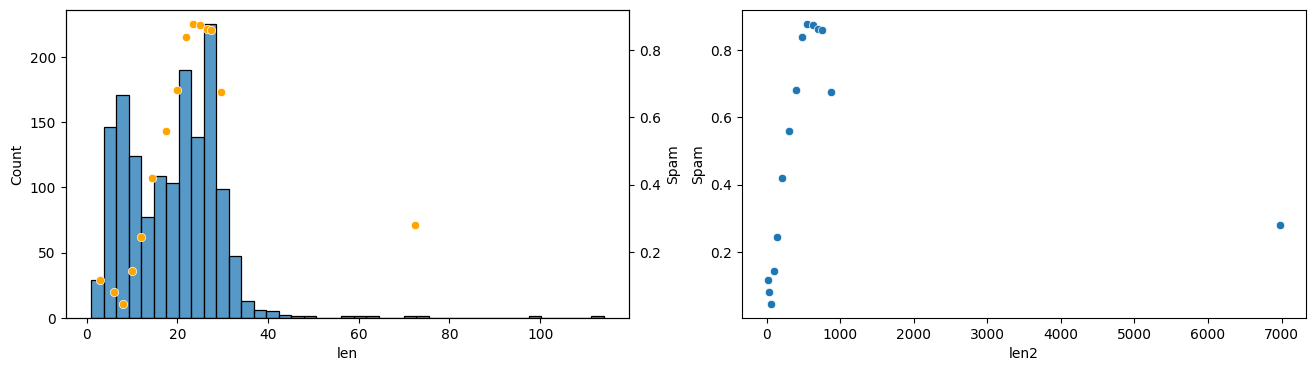

In [86]:
fig, axes = plt.subplots(1, 2, figsize=(16, 4))
s_len = df_spam2.groupby(pd.qcut(df_spam2['len'], q=15, duplicates='drop'))['Spam'].mean()
sns.histplot(data=df_spam2, x='len', ax=axes[0])
sns.scatterplot(x=s_len.index.map(lambda x: (x.left + x.right) / 2), y=s_len, ax=axes[0].twinx(), color='orange')
s_len2 = df_spam2.groupby(pd.qcut(df_spam2['len2'], q=15, duplicates='drop'))['Spam'].mean()
sns.scatterplot(x=s_len2.index.map(lambda x: (x.left + x.right) / 2), y=s_len2, ax=axes[1])
plt.show()

## 문제 3번 10점

**(spam#1_2를 이용하여)** 

Bag of Words 표현은 각각의 단어를 독립적인 Attribute로 정의해 해당 단어의 유무를 값으로 가지는 One-Hot Encoding 기법의 일종이다. 

Bag of Words를 사용해 단어를 벡터에 대응시키는 방법은 텍스트 마이닝에서 가장 기초적으로 활용되는 방법 중 하나이다. 

이에 따라, 문제 3번에서는 Bag of Words를 사용한 분석을 수행하려 한다.

등장하는 문서의 수가 20 회 이상인 단어의 수를 구하시오. 한 문서에 여러 회 등장하더라도 한 회로 카운트한다고 가정한다.

(답안예시) 123


In [92]:
df_spam1_2['Message'].str.split(' ').apply(lambda x: np.unique(x)).explode()\
            .value_counts().pipe(lambda x: x.loc[x >= 20])

to       662
you      455
a        452
i        384
call     370
        ... 
im        20
where     20
days      20
g         20
d         20
Name: Message, Length: 231, dtype: int64

In [101]:
dict_cnts = {}
for i in df_spam1_2['Message']:
    for j in set(i.split(' ')):
        dict_cnts[j] = dict_cnts.get(j, 0) + 1
pd.Series(dict_cnts).pipe(lambda x: x[ x >= 20])

text    120
c        62
free    183
rate     31
t       149
       ... 
too      21
he       30
lt       35
gt       36
lor      23
Length: 231, dtype: int64

In [103]:
from collections import Counter

cnt = Counter()
for i in df_spam1_2['Message']:
    for j in set(i.split(' ')):
        cnt.update((j, ))
pd.Series(cnt).pipe(lambda x: x[ x >= 20])

text    120
c        62
free    183
rate     31
t       149
       ... 
too      21
he       30
lt       35
gt       36
lor      23
Length: 231, dtype: int64

# 쉬는 시간: ~ 11:17

## 문제 4번 15점

**(spam#1_2를 이용하여)** 

이 문제에서는 단어의 상대적 출현 빈도를 반영하는 TF-IDF matrix를 구한 후 이를 이용해 스팸 분류기를 개발한다. 

본 스팸 분류기의 성능을 테스트함으로써 단어의 출현 빈도로 스팸의 분류가 가능한지를 파악할 수 있다. 

이를 위해 아래의 과정을 수행하고 질문에 답하시오.

**Step 4-1.** 

spam#1_2의 전처리된 Message 컬럼에 대하여 TF-IDF matrix를 생성한다. 

TF-IDF matrix의 (i,j) 위치의 entry는 i 번째의 문서 번호(row_number)를 가지는 문서의 j번째 단어의 TF-IDF score를 나타낸다. 

이 때, TF-IDF 값이 존재하지 않는 단어의 경우 0으로 값을 대체한다. 

따라서 모든 단어가 TF-IDF 값이 존재하지 않는 문서의 경우, 그 행의 모든 TF-IDF 값이 0이 된다.


Hint: 생성된 TF-IDF matrix는 1,494 행을 가지고 있다.

**Python 함수가이드**
```
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
```
- corpus는 String list 타입 변수를 np.array로 변환한 값을 입력해야 함

- CountVectorizer 객체를 선언해 corpus를 적용하고 TfidfTransformer 객체를 선언해 TF-IDF CSR matrix를 구한 다음 dense 형태로 변환할 것

- CountVectorizer에서 stop_words=’english’, min_df=10, max_features=1000

- 문제에서 지시한 값 외에 default 값 사용


**Step 4-2.**

TF-IDF matrix에서 문서 번호(row_number)가 4의 배수가 아닌 경우 Train Set으로, 4의 배수인 경우 Test Set으로 분리한다.

**Step 4-3.**

Train set에서 다항 나이브 베이즈 분류기 모형을 학습한다. 이 때, 독립변수는 Step 4-2에서 얻어진 각각의 단어의 TF-IDF matrix 값으로 한다.

Note. 총 독립변수의 수는 313개이다.

**Python 함수가이드**
```
from sklearn.naive_bayes import MultinomialNB
문제에서 지시한 값 외에 default 값 사용
```

**Step 4-4.**

Test Set에 훈련된 모형을 적용하고 정확도(accuracy)를 계산한다. 정확도는 다음과 같이 정의된다.

$정확도(accuracy)=\frac{예측값과 실제값이 일치하는 데이터의 수}{전체 데이터의 수} ×100$

계산된 정확도를 소수점 넷째 자리에서 반올림하여 소수점 셋째 자리까지 기술하시오.

 (답안예시) 12.345

**Step 4-α**

Step 4-2 TFIDF Matrix 종속 변수에  차원 축소를 통해 성능에 향상이 있는지 확인해보고자 합니다. 

PCA 차원 축소 과정 중에서 mean centering (각 입력변수를 평균이 0이 되도록 변환하는 과정)을 제외하여 Sparse Matrix를 축소하는 데 보다 처리 성능을 높인 Truncated SVD 모델을 사용합니다.(이 문제에서는 이미 dense matrix로 변환해서 의미는 없습니다.) 이 모델을 통해 종속변수의 입력 변수의 수를 32개로 축소합니다. 

Step 4-2에서 나눈 train 데이터셋으로 TruncatedSVD를 학습하고 변환하여 8개의 종속변수를 지닌 train_tsvd를 만들고, 

train 데이셋을 학습한 동일한 모델로 test셋에 적용하여 test_tsvd를 만듭니다.

train_tsvd로 로지스틱 회귀모델로 Spam에 대해 학습하고 test_tsvd에 대한 성능 평가를 합니다.

성능 평가 지표는 정확도를 사용합니다. 정확도를 구하세요.

$정확도(accuracy)=\frac{예측값과 실제값이 일치하는 데이터의 수}{전체 데이터의 수} ×100$

```
from sklearn.linear_model import LogisticRegression
solver='lbfgs', random_state=1234, C=100000

from sklearn.decomposition import TruncatedSVD
random_state=123

문제에서 지시한 값 외에 default 값 사용
```